# Principal Components Analysis Nutrition Exercise
En este ejercicio no vas a montar ningún modelo de Machine Learning supervisado, sino aprenderás a trabajar con PCA: pretratar el dato antes de calcular sus PCs, interpretarlos, graficar y escoger número de componentes según varianza.

Importa las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Importa los datos
1. Importa los datos: *nndb.csv*
2. Observa las columnas que hay, así como su tipo.

In [103]:
df = pd.read_csv('data/nndb_flat.csv')
df.head()

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [22]:
df.set_index('ID', inplace= True)

In [23]:
df.describe()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
count,8618.000000,8618.00000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,...,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000,8618.000000
mean,226.438617,11.52391,10.647024,21.819062,6.560253,2.023242,93.968786,0.264369,1.225260,7.925377,...,0.125765,0.213222,0.182499,0.174881,0.061176,0.000191,0.077965,0.222838,0.229363,0.179111
std,169.388910,10.55059,15.866353,27.239000,13.602098,4.313670,779.362205,0.478614,4.319183,57.582758,...,0.466402,0.302161,0.346062,0.431974,0.167803,0.000615,0.133496,0.290133,0.514406,0.305292
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,93.000000,2.47000,0.992500,0.040000,0.000000,0.000000,0.000000,0.034250,0.000000,0.000000,...,0.000000,0.023875,0.035385,0.025000,0.007500,0.000033,0.023810,0.052857,0.001818,0.020909
50%,191.000000,8.28500,5.235000,8.945000,0.370000,0.300000,1.500000,0.120000,0.080000,0.000000,...,0.017500,0.131250,0.115385,0.064583,0.015833,0.000088,0.047619,0.190000,0.070909,0.076818
75%,336.000000,19.97750,13.900000,32.900000,5.300000,2.400000,21.000000,0.355000,1.297500,2.500000,...,0.062500,0.314328,0.200000,0.185833,0.051667,0.000161,0.069048,0.308571,0.387273,0.245455
max,902.000000,88.32000,100.000000,100.000000,99.800000,79.000000,30000.000000,12.000000,98.890000,2400.000000,...,14.702500,7.968750,13.461538,19.479167,6.136667,0.016722,1.859524,14.168571,34.854545,8.268182


In [38]:
df.index.nunique()

8618

### Mira a ver la correlación entre las variables numéricas
¿Qué pasa con las columnas USRDA? ¿Hay que tomar alguna decisión?

In [24]:
df[['VitA_mcg', 'VitA_USRDA']]

,VitA_mcg,VitA_USRDA
ID,,
1001,684.0,0.760000
1002,684.0,0.760000
1003,840.0,0.933333
1004,198.0,0.220000
1005,292.0,0.324444
...,...,...
83110,47.0,0.052222
90240,2.0,0.002222
90480,0.0,0.000000


In [25]:
df['VitA_USRDA'].min()

0.0

In [26]:
df['VitA_USRDA'].max()

33.333333333333336

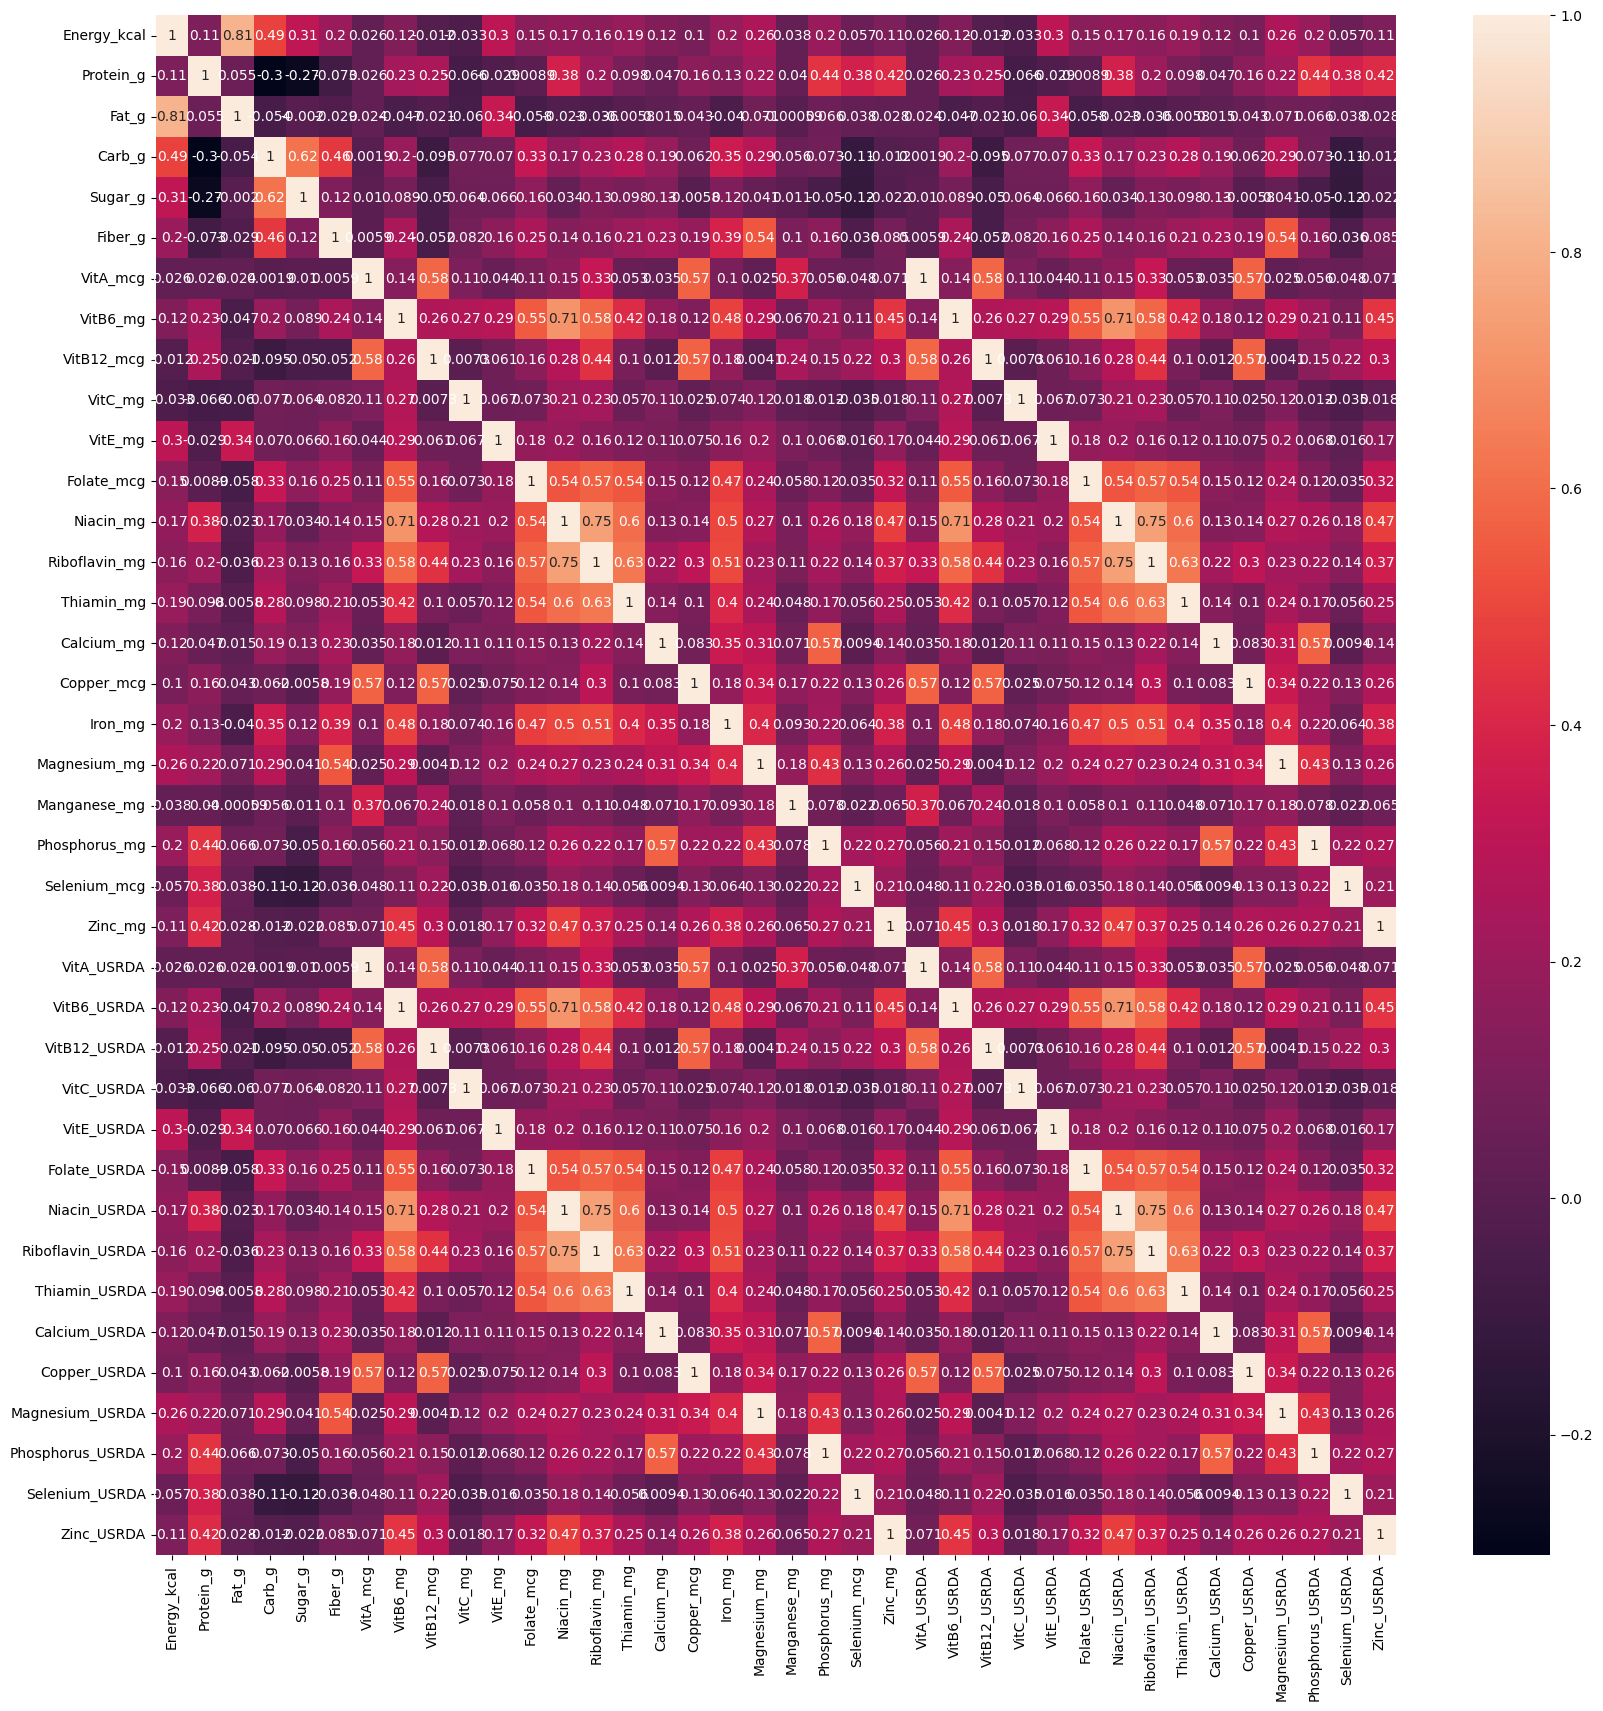

In [27]:
plt.figure(figsize= (20, 20))
sns.heatmap(df.corr(), annot= True);

In [28]:
columns_usrda = df.columns[df.columns.str.contains('USRDA')]

In [29]:
# df.select_dtypes(exclude= 'object')

In [30]:
df.drop(columns= columns_usrda, inplace= True)

### Variables no numéricas
Elimina las variables de texto del dataset

In [31]:
df = df.select_dtypes(exclude= 'object')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8618 entries, 1001 to 93600
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Energy_kcal    8618 non-null   float64
 1   Protein_g      8618 non-null   float64
 2   Fat_g          8618 non-null   float64
 3   Carb_g         8618 non-null   float64
 4   Sugar_g        8618 non-null   float64
 5   Fiber_g        8618 non-null   float64
 6   VitA_mcg       8618 non-null   float64
 7   VitB6_mg       8618 non-null   float64
 8   VitB12_mcg     8618 non-null   float64
 9   VitC_mg        8618 non-null   float64
 10  VitE_mg        8618 non-null   float64
 11  Folate_mcg     8618 non-null   float64
 12  Niacin_mg      8618 non-null   float64
 13  Riboflavin_mg  8618 non-null   float64
 14  Thiamin_mg     8618 non-null   float64
 15  Calcium_mg     8618 non-null   float64
 16  Copper_mcg     8618 non-null   float64
 17  Iron_mg        8618 non-null   float64
 18  Magn

### Distribuciones
Muchas de las variables tienen asimetría hacia la derecha. Deberíamos transformarlas para conseguir distribuciones normales y mejorar las correlaciones de cara al PCA y a futuros modelos lineales que vayamos a probar. Transforma todas las variables realizando una transformación Logarítmica.

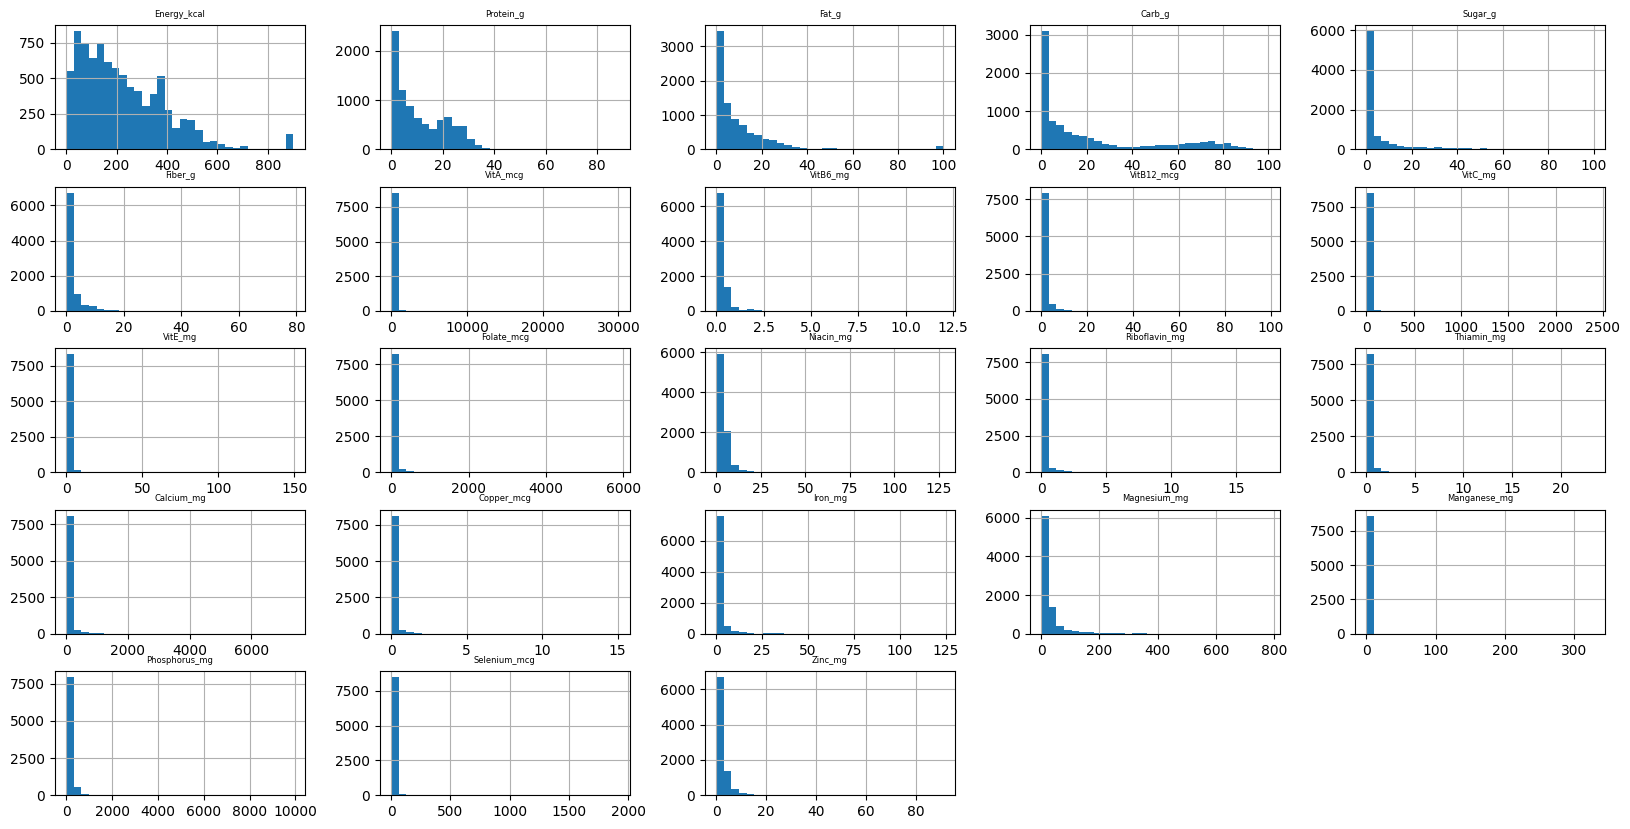

In [33]:
fig = df.hist(bins=30, figsize=(20, 10))
[x.title.set_size(6) for x in fig.ravel()];

In [34]:
df['Fiber_g']

ID
1001     0.0
1002     0.0
1003     0.0
1004     0.0
1005     0.0
        ... 
83110    0.0
90240    0.0
90480    0.0
90560    0.0
93600    0.0
Name: Fiber_g, Length: 8618, dtype: float64

In [35]:
np.log(1)

0.0

In [36]:
df_log = np.log1p(df)

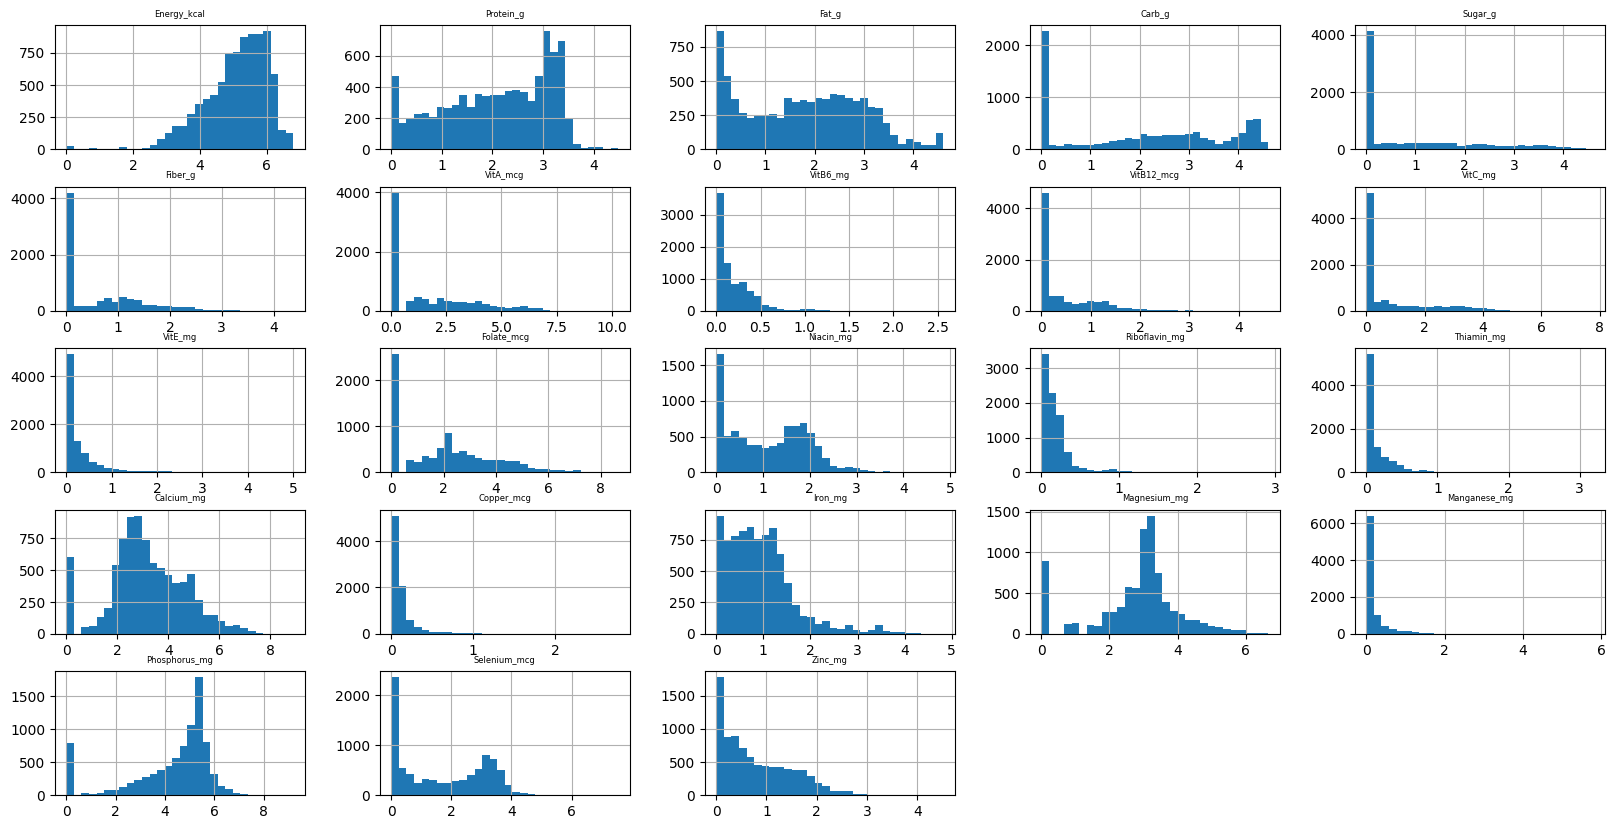

In [37]:
fig = df_log.hist(bins=30, figsize=(20, 10))
[x.title.set_size(6) for x in fig.ravel()];

### Estandarizado
Estandariza cada variable.

No es necesario que dividas en train y test.

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
df_log_scal = StandardScaler().fit_transform(df_log)

In [41]:
df_log_scal

array([[ 1.54041394, -1.37969871,  2.22252572, ..., -0.60719321,
        -0.7007746 , -1.02653251],
       [ 1.54041394, -1.37969871,  2.22252572, ..., -0.63094868,
        -0.7007746 , -1.08029176],
       [ 1.74566103, -1.72821981,  2.39348953, ..., -1.67362391,
        -1.18406043, -1.13613927],
       ...,
       [ 0.5368946 , -1.96180649, -1.51012816, ..., -1.20172081,
        -0.81408833, -0.90032061],
       [-0.57899174,  0.72461786, -0.76879934, ...,  0.78396183,
         1.14915612, -0.15377561],
       [-0.59032935,  0.90996043, -1.1667887 , ...,  0.54480405,
         0.82341485, -0.15377561]])

### Implementación del PCA
Prueba a montar un PCA con todos los componentes. Para ello utiliza los datos previamente transformados y escalados.

In [45]:
df_log_scal.shape

(8618, 23)

In [42]:
from sklearn.decomposition import PCA

In [51]:
pca = PCA(n_components=23)
pca.fit(df_log_scal)

PCA(n_components=23)

In [52]:
pca.components_.shape

(23, 23)

In [60]:
pca.components_

array([[ 1.98045037e-01,  2.77927414e-01,  1.48023630e-01,
         2.89780903e-03, -2.65499742e-02,  7.44287030e-02,
         7.99931465e-02,  2.63414232e-01,  2.15147624e-01,
        -2.41578310e-02,  8.06581235e-02,  1.95833995e-01,
         3.03454941e-01,  2.66735762e-01,  2.29400104e-01,
         1.54403008e-01,  1.88308882e-01,  2.81809108e-01,
         2.75670564e-01,  1.39020852e-01,  2.95597187e-01,
         2.47376233e-01,  2.98978117e-01],
       [ 5.43376081e-03, -2.42246049e-01, -1.50169742e-01,
         4.39120170e-01,  3.20254528e-01,  3.88059380e-01,
         1.09656229e-01,  7.44157690e-03, -2.36848125e-01,
         2.56138028e-01,  1.24465943e-01,  2.12485525e-01,
        -1.07131816e-01,  7.25659699e-02,  1.60925570e-01,
         2.04121098e-01,  1.36706989e-01,  1.24534002e-01,
         1.12674513e-01,  2.59182219e-01, -6.16379393e-02,
        -2.25185178e-01, -1.59529783e-01],
       [-5.22265271e-01, -7.90226661e-02, -4.73911046e-01,
        -2.10881292e-01, -1.8

In [59]:
pca.explained_variance_

array([7.18858937, 3.83374047, 1.9626382 , 1.63589015, 1.35819967,
       1.03231127, 0.70837049, 0.62536385, 0.58366083, 0.52038727,
       0.50482228, 0.43827317, 0.42615271, 0.32951884, 0.3104666 ,
       0.29854271, 0.25769498, 0.22415104, 0.21382194, 0.17182004,
       0.15963602, 0.13025079, 0.08836646])

In [56]:
pca.explained_variance_ratio_

array([0.3125111 , 0.16666503, 0.08532219, 0.07111741, 0.05904531,
       0.04487789, 0.03079514, 0.02718658, 0.02537361, 0.02262291,
       0.02194625, 0.01905314, 0.01852623, 0.01432524, 0.01349698,
       0.01297861, 0.01120283, 0.00974457, 0.00929553, 0.00746957,
       0.00693989, 0.00566242, 0.00384157])

### Aportación de cada PCA
Visualiza en un diagrama de líneas la suma acumulada de la varianza explicativa del PCA.

Si tuviéses que quedarte con 70-75 % de la varianza original, ¿con cuántos Principal Components te quedarías?

In [61]:
pca.explained_variance_ratio_.cumsum()

array([0.3125111 , 0.47917612, 0.56449832, 0.63561572, 0.69466103,
       0.73953892, 0.77033406, 0.79752064, 0.82289426, 0.84551716,
       0.86746341, 0.88651656, 0.90504278, 0.91936803, 0.93286501,
       0.94584362, 0.95704645, 0.96679102, 0.97608654, 0.98355611,
       0.99049601, 0.99615843, 1.        ])

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.3125111  0.47917612 0.56449832 0.63561572 0.69466103 0.73953892
 0.77033406 0.79752064 0.82289426 0.84551716 0.86746341 0.88651656
 0.90504278 0.91936803 0.93286501 0.94584362 0.95704645 0.96679102
 0.97608654 0.98355611 0.99049601 0.99615843 1.        ]


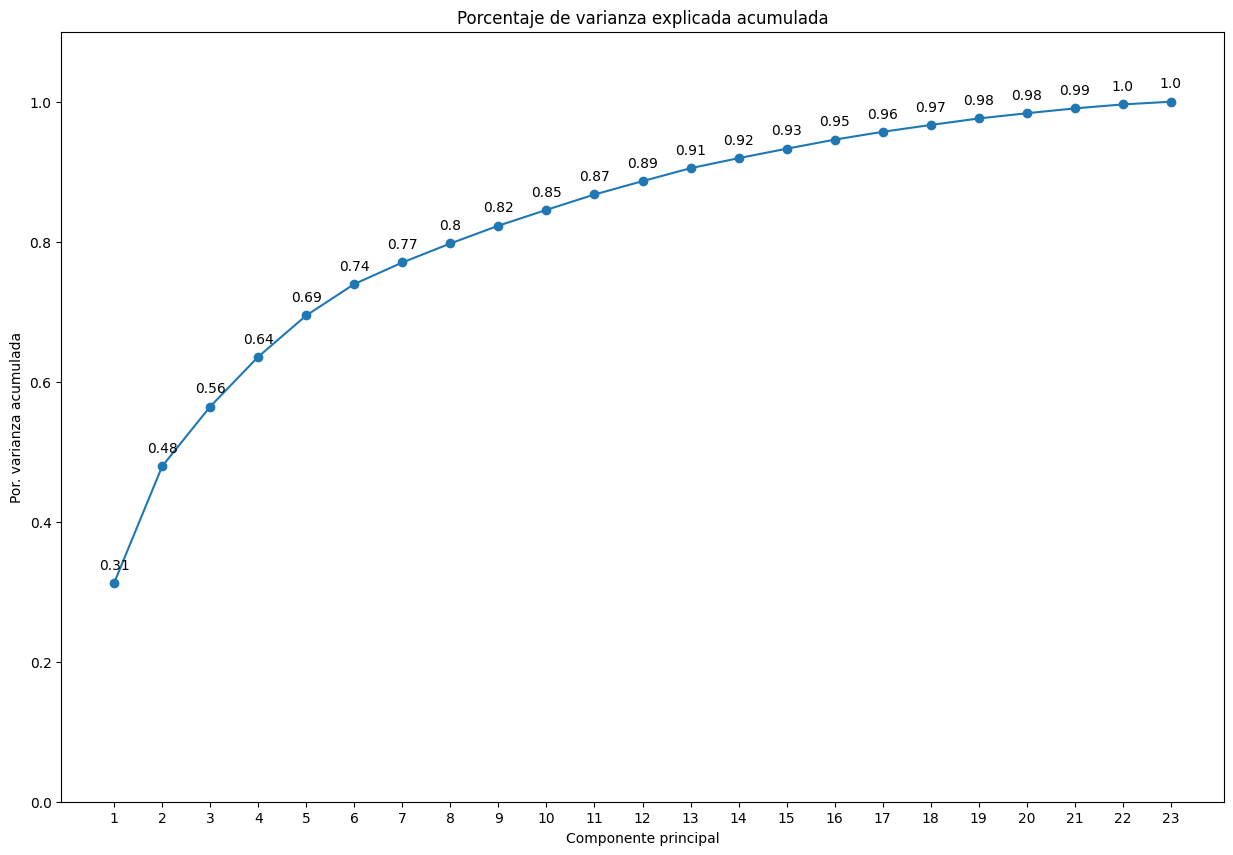

In [72]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
ax.plot(
    np.arange(len(df.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

## Feat. Red
Crea un nuevo PCA con X Principal Components, siendo X la cantidad de PC escogidos en el apartado anterior.

Obtén el nuevo dataset con el mismo número de registros que el original, pero en este caso con X features, que representan los PC elegidos.

In [95]:
pca_6 = PCA(n_components= 6)

In [96]:
df_compressed = pca_6.fit_transform(df_log_scal)

In [97]:
pcs_strs = []
str_pca = 'PCA'

for i in range(1, 7):
    pcs_strs.append(str_pca + str(i))

In [98]:
pcs_strs

['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6']

In [99]:
df_compressed = pd.DataFrame(data = df_compressed, columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

In [101]:
df_compressed.index = df.index

In [102]:
df_compressed

,PC1,PC2,PC3,PC4,PC5,PC6
ID,,,,,,
1001,-2.139032,-0.968024,-1.463942,0.270873,4.066394,0.306729
1002,-2.106485,-0.909496,-1.480425,0.263439,4.032595,0.348235
1003,-3.267828,-1.138422,-2.042095,1.175758,4.071769,1.326177
1004,1.525962,-1.264144,0.135682,-0.930508,2.427032,-2.095343
1005,1.240708,-1.204177,0.004301,-1.192889,2.687219,-2.343113
...,...,...,...,...,...,...
83110,2.553656,-2.548737,0.471547,-0.110507,2.715332,0.017877
90240,0.075016,-1.840936,0.935581,-1.349069,-0.392800,-0.761149
90480,-2.930523,1.664466,-1.241247,1.173787,-0.912044,-0.886676


### ¿Qué grupo de comida tiene los valores más altos en cada categoría?
Determina para cada Principal Component, los 3 grupos de comida (*FoodGroup*) con los valores del PC más altos.

In [111]:
df.set_index('ID', inplace= True)

In [112]:
df_compressed['FoodGroup'] = df['FoodGroup'] 

In [113]:
df['FoodGroup']

ID
1001             Dairy and Egg Products
1002             Dairy and Egg Products
1003             Dairy and Egg Products
1004             Dairy and Egg Products
1005             Dairy and Egg Products
                      ...              
83110    Finfish and Shellfish Products
90240    Finfish and Shellfish Products
90480                            Sweets
90560    Finfish and Shellfish Products
93600    Finfish and Shellfish Products
Name: FoodGroup, Length: 8618, dtype: object

In [114]:
df_compressed

,PC1,PC2,PC3,PC4,PC5,PC6,FoodGroup
ID,,,,,,,
1001,-2.139032,-0.968024,-1.463942,0.270873,4.066394,0.306729,Dairy and Egg Products
1002,-2.106485,-0.909496,-1.480425,0.263439,4.032595,0.348235,Dairy and Egg Products
1003,-3.267828,-1.138422,-2.042095,1.175758,4.071769,1.326177,Dairy and Egg Products
1004,1.525962,-1.264144,0.135682,-0.930508,2.427032,-2.095343,Dairy and Egg Products
1005,1.240708,-1.204177,0.004301,-1.192889,2.687219,-2.343113,Dairy and Egg Products
...,...,...,...,...,...,...,...
83110,2.553656,-2.548737,0.471547,-0.110507,2.715332,0.017877,Finfish and Shellfish Products
90240,0.075016,-1.840936,0.935581,-1.349069,-0.392800,-0.761149,Finfish and Shellfish Products
90480,-2.930523,1.664466,-1.241247,1.173787,-0.912044,-0.886676,Sweets


In [126]:
df_compressed.groupby('FoodGroup').mean().sum(axis= 1).sort_values(ascending =  False).head(3)

FoodGroup
Breakfast Cereals        8.255801
Spices and Herbs         6.198076
Nut and Seed Products    3.899855
dtype: float64